In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN
import matplotlib.pyplot as plt

df = pd.read_csv('Weather Data.csv', index_col='Date/Time', parse_dates=['Date/Time'])
df=df.dropna()
df.head()

,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather
Date/Time,,,,,,,
2012-01-01 00:00:00,-1.8,-3.9,86,4,8.0,101.24,Fog
2012-01-01 01:00:00,-1.8,-3.7,87,4,8.0,101.24,Fog
2012-01-01 02:00:00,-1.8,-3.4,89,7,4.0,101.26,"Freezing Drizzle,Fog"
2012-01-01 03:00:00,-1.5,-3.2,88,6,4.0,101.27,"Freezing Drizzle,Fog"
2012-01-01 04:00:00,-1.5,-3.3,88,7,4.8,101.23,Fog


In [2]:
print('Shape of data',df.shape)

Shape of data (8784, 7)


In [3]:
features = ['Temp_C', 'Dew Point Temp_C', 'Rel Hum_%']
data = df[features].values

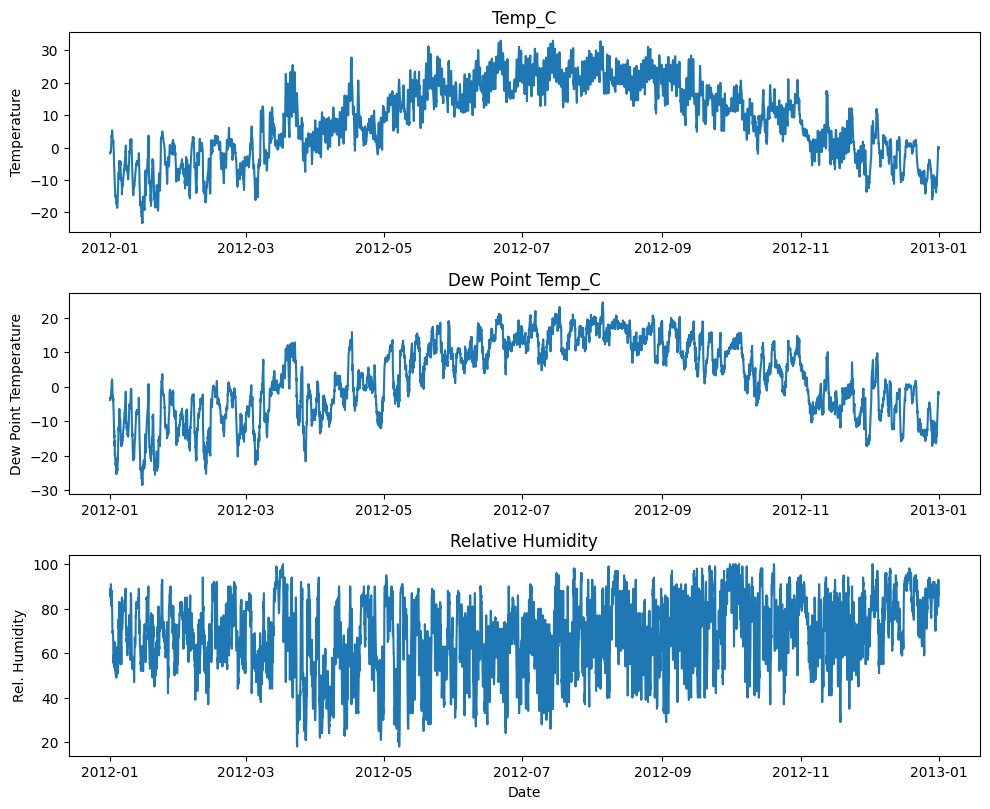

In [4]:
import matplotlib.pyplot as plt

# Create subplots
fig, axes = plt.subplots(3, 1, figsize=(10, 8))

# Plotting meanpressurem_1
axes[0].plot(df.index, df['Temp_C'])
axes[0].set_title('Temp_C')
axes[0].set_ylabel('Temperature')

# Plotting meantempm
axes[1].plot(df.index, df['Dew Point Temp_C'])
axes[1].set_title('Dew Point Temp_C')
axes[1].set_ylabel('Dew Point Temperature')

# Plotting precipm_1
axes[2].plot(df.index, df['Rel Hum_%'])
axes[2].set_title('Relative Humidity')
axes[2].set_ylabel('Rel. Humidity')

# Adjust layout
plt.tight_layout()
plt.xlabel('Date')
plt.show()


In [5]:
scaler = MinMaxScaler(feature_range=(0, 1))
data_scaled = scaler.fit_transform(data)

In [6]:
sequence_length = 30

In [7]:
# Prepare data for training
X, y = [], []
for i in range(len(data_scaled) - sequence_length):
    X.append(data_scaled[i:i+sequence_length, :])
    y.append(data_scaled[i+sequence_length, :])  

X, y = np.array(X), np.array(y) 

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

In [9]:
model = Sequential()
model.add(SimpleRNN(units=64, input_shape=(X.shape[1], X.shape[2]), activation="relu"))
model.add(Dense(32, activation="relu"))
model.add(Dense(3))
model.compile(loss='mean_squared_error', optimizer='adam')
model.summary()



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 64)                4352      
                                                                 
 dense (Dense)               (None, 32)                2080      
                                                                 
 dense_1 (Dense)             (None, 3)                 99        
                                                                 
Total params: 6531 (25.51 KB)
Trainable params: 6531 (25.51 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [10]:
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.1, verbose=1)

Epoch 1/50

197/197 [==============================] - 4s 9ms/step - loss: 0.0160 - val_loss: 0.0019
Epoch 2/50
197/197 [==============================] - 1s 7ms/step - loss: 0.0016 - val_loss: 0.0015
Epoch 3/50
197/197 [==============================] - 1s 7ms/step - loss: 0.0015 - val_loss: 0.0017
Epoch 4/50
197/197 [==============================] - 1s 7ms/step - loss: 0.0014 - val_loss: 0.0014
Epoch 5/50
197/197 [==============================] - 1s 7ms/step - loss: 0.0013 - val_loss: 0.0014
Epoch 6/50
197/197 [==============================] - 1s 7ms/step - loss: 0.0013 - val_loss: 0.0015
Epoch 7/50
197/197 [==============================] - 1s 7ms/step - loss: 0.0013 - val_loss: 0.0014
Epoch 8/50
197/197 [==============================] - 1s 7ms/step - loss: 0.0013 - val_loss: 0.0014
Epoch 9/50
197/197 [==============================] - 1s 7ms/step - loss: 0.0013 - val_loss: 0.0015
Epoch 10/50
197/197 [==============================] - 1s 7ms/step - loss: 0.0013 - val_loss: 0.001

In [11]:
test_predictions_scaled = model.predict(X_test)
test_predictions = scaler.inverse_transform(test_predictions_scaled)
y_test_inverse = scaler.inverse_transform(y_test)

55/55 [==============================] - 1s 4ms/step


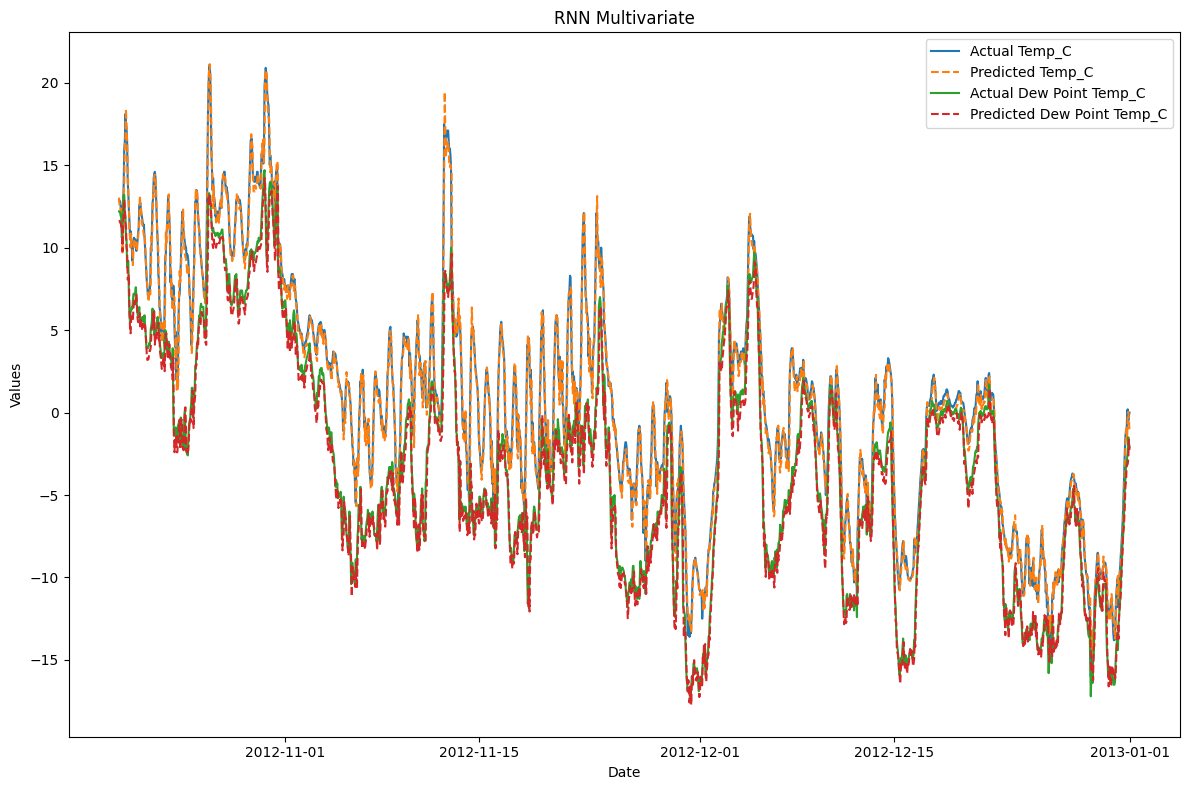

In [16]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))

# Plot the results
for i in range(2):
    plt.plot(df.index[-len(y_test):], y_test_inverse[:, i], label='Actual ' + features[i])
    plt.plot(df.index[-len(y_test):], test_predictions[:, i], label='Predicted ' + features[i], linestyle='dashed')

plt.ylabel('Values')
plt.xlabel('Date')
plt.legend()
plt.title('RNN Multivariate')
plt.tight_layout()
plt.show()

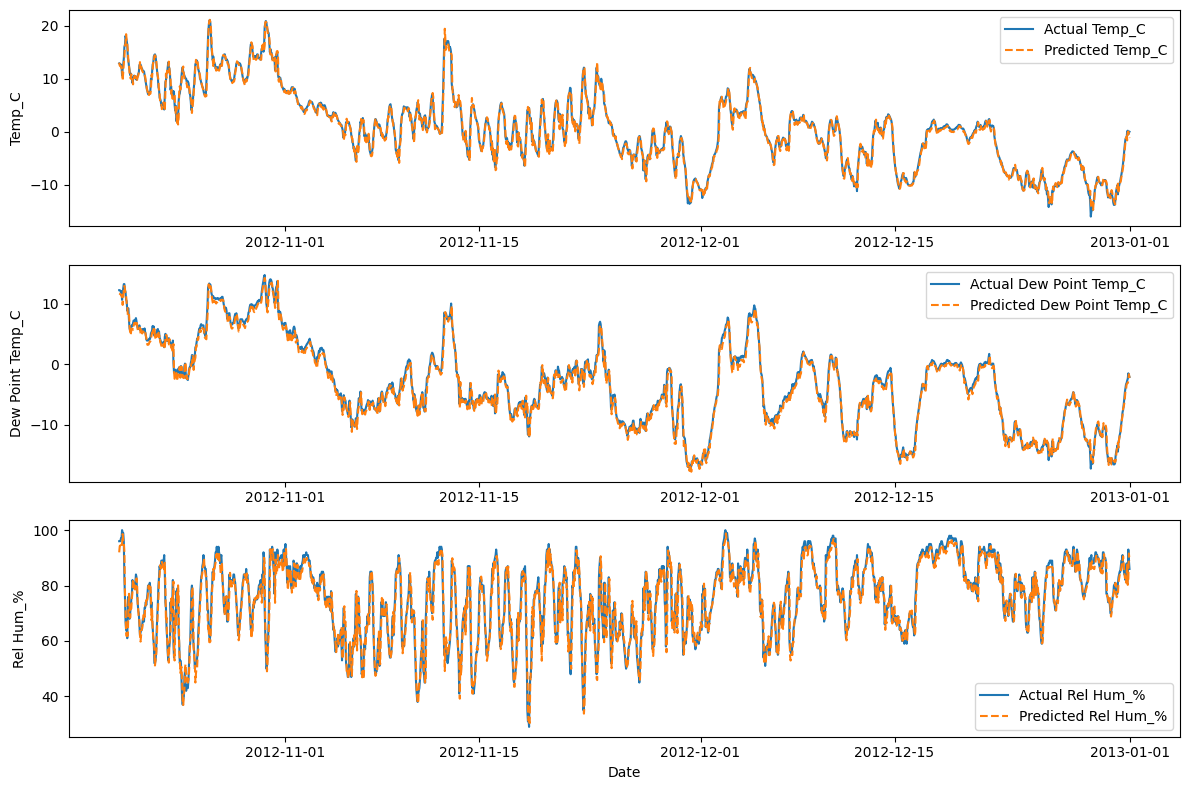

In [17]:
plt.figure(figsize=(12, 8))
for i, feature in enumerate(features):
    plt.subplot(len(features), 1, i+1)
    plt.plot(df.index[-len(y_test):], y_test_inverse[:, i], label='Actual ' + feature)
    plt.plot(df.index[-len(y_test):], test_predictions[:, i], label='Predicted ' + feature, linestyle='dashed')
    plt.ylabel(feature)
    plt.legend()
plt.xlabel('Date')
plt.tight_layout()
plt.show()

In [19]:
# Calculate RMSE for each feature
from sklearn.metrics import mean_squared_error
rmse_per_feature = []
for i in range(3):
    rmse_feature = np.sqrt(mean_squared_error(y_test_inverse[:, i], test_predictions[:, i]))
    rmse_per_feature.append(rmse_feature)
    print("RMSE for", features[i], ":", rmse_feature)

RMSE for Temp_C : 0.8085752584394233
RMSE for Dew Point Temp_C : 0.8372984238526819
RMSE for Rel Hum_% : 4.061464489507936


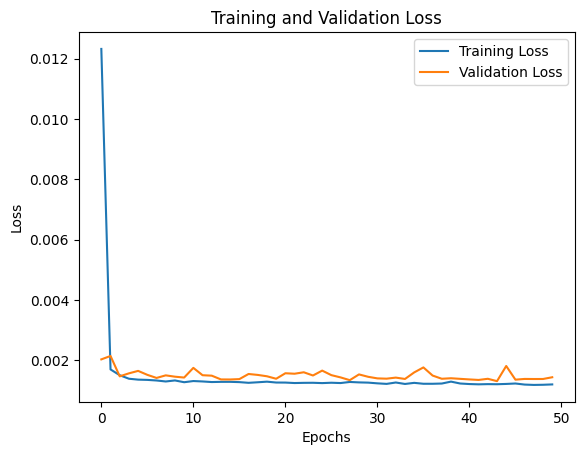

In [ ]:
# Plot epochs vs loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()